In [1]:
import numpy as np
from sympy import symbols, Eq, solve
import sympy as sp
from functools import cache
import matplotlib.pyplot as plt

## Linearen Gleichungssysteme

### Apotheker Beispiel

Ein Apotheker hat 36% und 21% Alkohol. Welche Mengen muss er mischen, um 5 Liter 30% Alkohol zu erhalten?

I x1 + x2 = 5

II 0.36x1 + 0.21x2 = 1.5

In [3]:
A = np.array([
    [1, 1],
    [0.36, 0.2]
])

b = np.array([
    [5],
    [1.5]
]
)

x = np.linalg.solve(A, b)
print(x)

### Lösung: x1 = 3.125, x2 = 1.875

[[3.125]
 [1.875]]


### Reaktionsgleichungen auflösen
$$
\text{C} +  \text{Fe}_2\text{O}_3 \rightarrow \text{Fe} + \text{CO}_2
$$

#### (1) Variablen einführen:
$$
a*\text{C} +  b*\text{Fe}_2\text{O}_3 \rightarrow c*\text{Fe} + d*\text{CO}_2
$$

#### (2) LGS aufstellen:

I   a = d

II  2b = c

III 3b = 2d


In [4]:
a, b, c, d = symbols('a b c d')

# Lineare Gleichungen aufstellen:
eq1 = Eq(a - d, 0)
eq2 = Eq(2*b - c, 0)
eq3 = Eq(3*b - 2*d, 0)

# erste Lösung:
lsg1 = solve([eq1, eq2, eq3], (a, b, d))
print("Lösung in Abhängigkeit von c:", lsg1)

# Now you can substitute c with a value like 4
lsg2 = {c: 4}
lsg2 = {var: lsg1[var].subs(lsg2) for var in lsg1}
print("Lösung für c = 4:", lsg2)

Lösung in Abhängigkeit von c: {a: 3*c/4, b: c/2, d: 3*c/4}
Lösung für c = 4: {a: 3, b: 2, d: 3}


## Chemische Reaktionen im Mehrspeziessystem

### Kern und Abbild

In [5]:
A = sp.Matrix([[1, 2], [3, 6]])
A

Matrix([
[1, 2],
[3, 6]])

In [6]:

kern = A.nullspace()[0]
print("Der Kern (Nullraum) der Matrix ist:")
kern


Der Kern (Nullraum) der Matrix ist:


Matrix([
[-2],
[ 1]])

In [7]:
bild = A.columnspace()[0]

print("Der Spaltenraum (Bild) der Matrix ist:")
bild

Der Spaltenraum (Bild) der Matrix ist:


Matrix([
[1],
[3]])

### Beispiel
$$
    (\text{Na}_2\text{O}, \text{Cr}\text{Cl}_3, \text{Na}\text{O}\text{H}, \text{Na}\text{Cl}, \text{H}_2\text{O}, \text{Na}_2\text{Cr}\text{O}_4, \text{Cl}_2), (H, O, Cr, Cl)
$$


In [8]:
# Formelmatrix A:

A = sp.Matrix(
    [[0, 0, 1, 0, 2, 0, 0],
     [1, 0, 1, 0, 1, 4, 0],
     [2, 0, 1, 1, 0, 2, 0],
     [0, 1, 0, 0, 0, 1, 0],
     [0, 3, 0, 1, 0, 0, 2]]
)
A

Matrix([
[0, 0, 1, 0, 2, 0, 0],
[1, 0, 1, 0, 1, 4, 0],
[2, 0, 1, 1, 0, 2, 0],
[0, 1, 0, 0, 0, 1, 0],
[0, 3, 0, 1, 0, 0, 2]])

In [9]:
# Gauß-Verfahren und A^:

A_rref = sp.Matrix(
    [[1, 0, 0, 0, 0, 4, -1],
     [0, 1, 0, 0, 0, 1, 0],
     [0, 0, 1, 0, 0, 0, 2],
     [0, 0, 0, 1, 0, -6, 0],
     [0, 0, 0, 0, 1, 3/2, 0]]
)
A_rref
A_hut = A_rref[:, [5, 6]] * -1

A_hut


Matrix([
[  -4,  1],
[  -1,  0],
[   0, -2],
[   6,  0],
[-1.5,  0]])

In [10]:
# Stöchiometrische Matrix Y:

Y = A_hut.row_insert(A_hut.rows, sp.Matrix.eye(A_hut.cols))
Y

Matrix([
[  -4,  1],
[  -1,  0],
[   0, -2],
[   6,  0],
[-1.5,  0],
[   1,  0],
[   0,  1]])

Reaktionen: 

$$
     17\text{Na}\text{Cl} + 2\text{Na}_2\text{Cr}\text{O}_4 \rightarrow\ 8\text{Na}_2\text{O} + 2\text{Cr}\text{Cl}_3 + 3\text{Cl}_2
$$

$$
     \text{Na}_2\text{O} + \text{H}_2\text{O} \rightarrow\ 2\text{Na}\text{O}\text{H}
$$

## Dynamische Modelle - Diskrete Modelle

### Baktieren Beispiel

In [11]:
x0 = 1

@cache
def rekursion(n: int) -> float:
    if n == 0:
        return x0
    else:
        return rekursion(n - 1) * 2

def explizit(n: int) -> float:
    return 2**n * x0

def allgemein(n: int) -> float:
    return x0 * np.exp(n * np.log(2))

print("Rekursion:", rekursion(72))
print("Explizit:", explizit(72))
print("Algemein:", allgemein(72))

Rekursion: 4722366482869645213696
Explizit: 4722366482869645213696
Algemein: 4.7223664828696415e+21


### Baktieren Beispiel mit beschränkten Ressourcen

Rekursion: 57331.1396690838


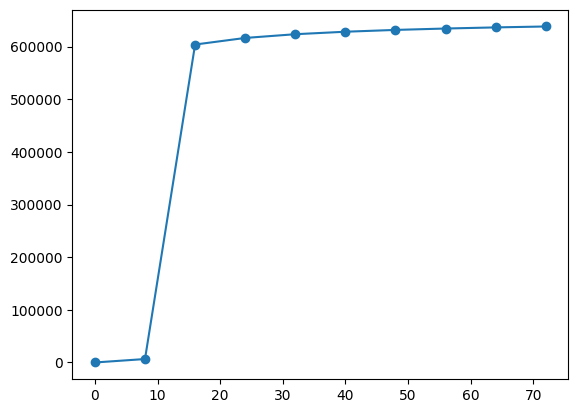

In [12]:
def wachstumsrate(x: float, k: int, r: float) -> float:
    return r * (1 - x/k)


@cache
def rekursion(n: int) -> float:
    if n == 0:
        return x0
    else:
        xn = rekursion(n - 1)
        r = wachstumsrate(xn, 10**6, 3)
        return xn * r
    
print("Rekursion:", rekursion(10))

x = [x for x in np.linspace(0, 72, 10)]
y = [rekursion(xn) for xn in x]
plt.plot(x, y, "-o")
plt.show()

Rekursion: 642672.6260170431


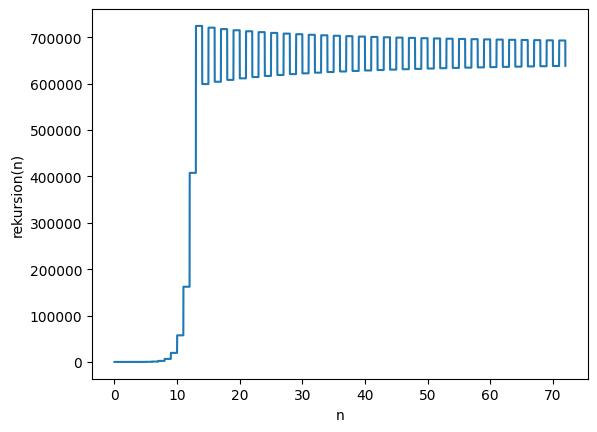

In [13]:
def wachstumsrate(x: float, k: int, r: float) -> float:
    return r * (1 - x / k)

def rekursion_iterative(n: int, x0: float) -> float:
    xn = x0
    for i in range(1, n + 1):
        r = wachstumsrate(xn, 10**6, 3)
        xn = xn * r
    return xn

x0 = 1

result = rekursion_iterative(100, x0)
print("Rekursion:", result)

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 72, 10000)
y = [rekursion_iterative(int(xn), x0) for xn in x]

plt.plot(x, y)
plt.xlabel('n')
plt.ylabel('rekursion(n)')
plt.show()


### Graphen

In [45]:
A = np.array([
    [0, 1, 0, 0],
    [1, 0, 1, 1],
    [0, 1, 0, 1],
    [0, 1, 1, 0]
])

D = np.array([[1, 0, 0, 0],
              [0, 3, 0, 0],
              [0, 0, 2, 0],
              [0, 0, 0, 2]])

D_1 = np.linalg.inv(D)

P = np.linalg.inv(D) @ A

#### Irrfahrt (Random Walk)

In [46]:
print(np.linalg.matrix_power(A, 3))
print(np.linalg.matrix_power(P, 3))

[[0 3 1 1]
 [3 2 4 4]
 [1 4 2 3]
 [1 4 3 2]]
[[0.         0.66666667 0.16666667 0.16666667]
 [0.22222222 0.16666667 0.30555556 0.30555556]
 [0.08333333 0.45833333 0.16666667 0.29166667]
 [0.08333333 0.45833333 0.29166667 0.16666667]]


#### Konvergenz - Stationäre Verteilung

In [47]:
def simulate_convergence(P, steps=100):
    P_t = np.linalg.matrix_power(P, steps)
    return P_t

P_t = simulate_convergence(P, steps=1000)
print(P_t)

[[0.125 0.375 0.25  0.25 ]
 [0.125 0.375 0.25  0.25 ]
 [0.125 0.375 0.25  0.25 ]
 [0.125 0.375 0.25  0.25 ]]


In [51]:
print("Übergangsmatrix P: \n", P)
print("Transpornierte Matrix: \n", P.T)
print("Einheitsmatrix : \n", np.eye(4))

A = P.T - np.eye(4)
print("Transponierte Matrix - Einheitsmatrix: \n", A)

# Hinzufügen der Bedingung, dass die Summe von pi 1 ergibt
A[-1] = [1, 1, 1, 1]
print("Hinzufügen der Bedingung: 1 1 1 1 : \n", A)

# Rechte Seite des Gleichungssystems (alles 0 außer der letzten 1)
b = np.array([0, 0, 0, 1])

pi = np.linalg.solve(A, b)

print("Stationäre Verteilung pi: \n", pi)

Übergangsmatrix P: 
 [[0.         1.         0.         0.        ]
 [0.33333333 0.         0.33333333 0.33333333]
 [0.         0.5        0.         0.5       ]
 [0.         0.5        0.5        0.        ]]
Transpornierte Matrix: 
 [[0.         0.33333333 0.         0.        ]
 [1.         0.         0.5        0.5       ]
 [0.         0.33333333 0.         0.5       ]
 [0.         0.33333333 0.5        0.        ]]
Einheitsmatrix : 
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
Transponierte Matrix - Einheitsmatrix: 
 [[-1.          0.33333333  0.          0.        ]
 [ 1.         -1.          0.5         0.5       ]
 [ 0.          0.33333333 -1.          0.5       ]
 [ 0.          0.33333333  0.5        -1.        ]]
Hinzufügen der Bedingung: 1 1 1 1 1: 
 [[-1.          0.33333333  0.          0.        ]
 [ 1.         -1.          0.5         0.5       ]
 [ 0.          0.33333333 -1.          0.5       ]
 [ 1.          1.          1.          1.        ]]
Statio

#### Pagerank

In [18]:
A = np.array([
    [0, 0, 1, 1, 0],
    [1, 0, 0, 0, 0],
    [1, 0, 0, 0, 1],
    [0, 0, 0, 1, 0],
    [1, 1, 1, 1, 1]
])

D = np.diag(np.sum(A, axis=1))
P = np.linalg.inv(D) @ A

## Räuber Beute Modell

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
a = 0.1  # Wachstumsrate der Beute
b = 0.02  # Effektivität (Räuber fangen Beute)
c = 0.1  # Sterberate der Räube
d = 0.01  # Effizienz der Beute in Räuberwachstum

In [6]:
def räuber_beute_modell(t, z):
    """X1: Beutepopulation, X2: Räuberpopulation"""
    
    X1, X2 = z  
    dX1dt = a * X1 - b * X1 * X2
    dX2dt = d * X1 * X2 - c * X2
    return [dX1dt, dX2dt]

X1_0 = 40  # Startgröße zum Zeitpunkt 0 der Beutepopulation
X2_0 = 9   # Startgröße zum Zeitpunkt 0 der Räuberpopulation
z0 = [X1_0, X2_0]

In [8]:
zeit = (0, 200)  # von t=0 bis t=200
zeit_eval = np.linspace(zeit[0], zeit[1], 1000) 

solution = solve_ivp(räuber_beute_modell, zeit, z0, t_eval=zeit_eval, method="RK45")

t = solution.t
X1, X2 = solution.y

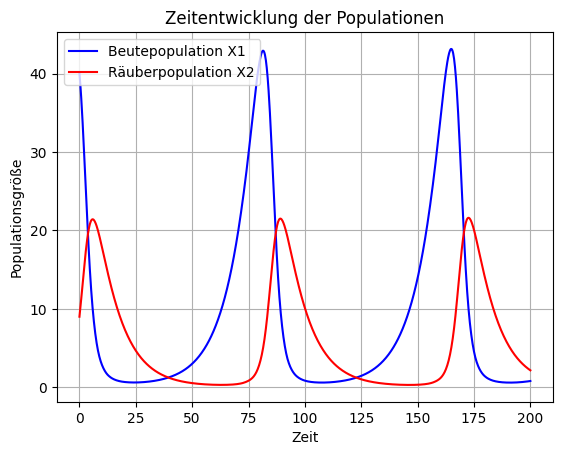

In [15]:
plt.plot(t, X1, label="Beutepopulation X1", color="blue")
plt.plot(t, X2, label="Räuberpopulation X2", color="red")
plt.xlabel("Zeit")
plt.ylabel("Populationsgröße")
plt.title("Zeitentwicklung der Populationen")
plt.legend()
plt.grid()
plt.show()

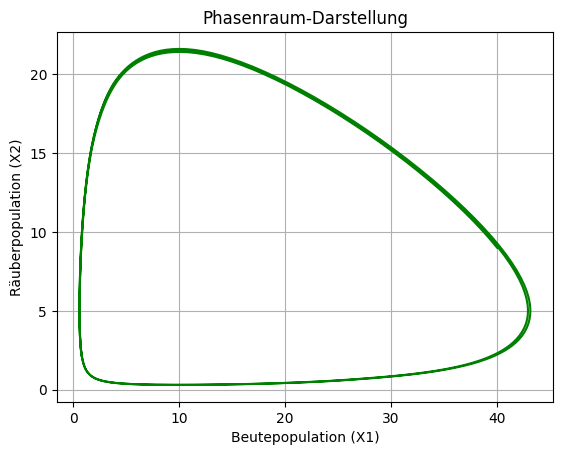

In [17]:
plt.plot(X1, X2, color="green")
plt.xlabel("Beutepopulation (X1)")
plt.ylabel("Räuberpopulation (X2)")
plt.title("Phasenraum-Darstellung")
plt.grid()
plt.show()

## SIR Modell

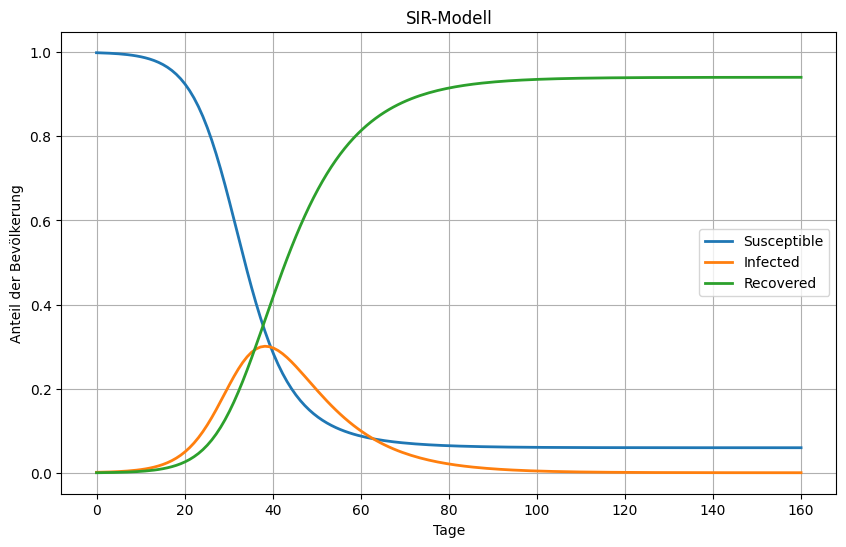

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def sir_model(y, t, beta, gamma):
    S, I, R = y
    dS_dt = -beta * S * I
    dI_dt = beta * S * I - gamma * I
    dR_dt = gamma * I
    return [dS_dt, dI_dt, dR_dt]

# Parameter initialisieren
N = 1000  # Gesamtbevölkerung
I0 = 1    # Initial infizierte Personen
R0 = 0    # Initial genesene Personen
S0 = N - I0 - R0  # Initial anfällige Personen

beta = 0.3  # Infektionsrate
gamma = 0.1  # Genesungsrate

# Zeitschritte definieren
t = np.linspace(0, 160, 160)  # 160 Tage

# Anfangswerte
y0 = [S0 / N, I0 / N, R0 / N]  # Normalisierte Werte (Anteil an der Gesamtbevölkerung)

# Differentialgleichungen lösen
solution = odeint(sir_model, y0, t, args=(beta, gamma))
S, I, R = solution.T

# Ergebnisse visualisieren
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible', lw=2)
plt.plot(t, I, label='Infected', lw=2)
plt.plot(t, R, label='Recovered', lw=2)
plt.title('SIR-Modell')
plt.xlabel('Tage')
plt.ylabel('Anteil der Bevölkerung')
plt.legend()
plt.grid()
plt.show()

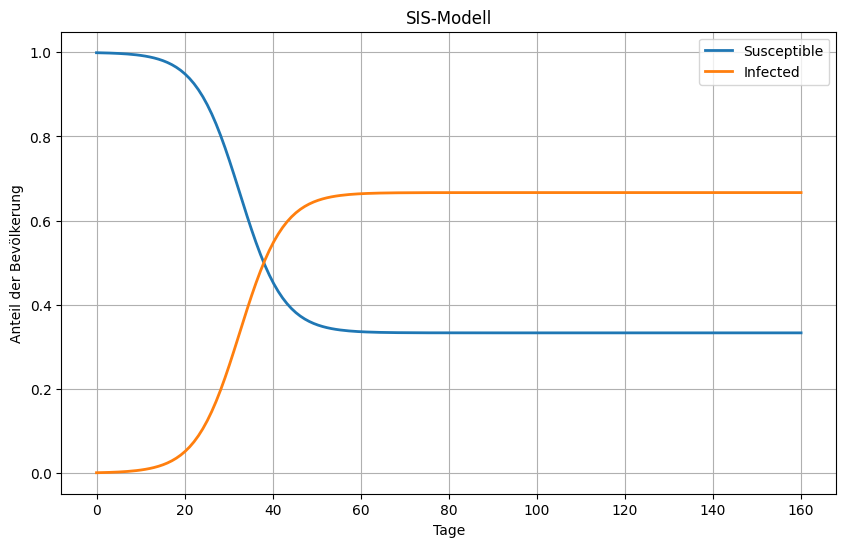

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def sis_model(y, t, beta, gamma):
    S, I = y
    dS_dt = gamma * I - beta * S * I
    dI_dt = beta * S * I - gamma * I
    return [dS_dt, dI_dt]

# Parameter initialisieren
N = 1000  # Gesamtbevölkerung
I0 = 1    # Initial infizierte Personen
S0 = N - I0  # Initial anfällige Personen

beta = 0.3  # Infektionsrate
gamma = 0.1  # Genesungsrate

# Zeitschritte definieren
t = np.linspace(0, 160, 160)  # 160 Tage

# Anfangswerte
y0 = [S0 / N, I0 / N]  # Normalisierte Werte (Anteil an der Gesamtbevölkerung)

# Differentialgleichungen lösen
solution = odeint(sis_model, y0, t, args=(beta, gamma))
S, I = solution.T

# Ergebnisse visualisieren
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible', lw=2)
plt.plot(t, I, label='Infected', lw=2)
plt.title('SIS-Modell')
plt.xlabel('Tage')
plt.ylabel('Anteil der Bevölkerung')
plt.legend()
plt.grid()
plt.show()


## DGL

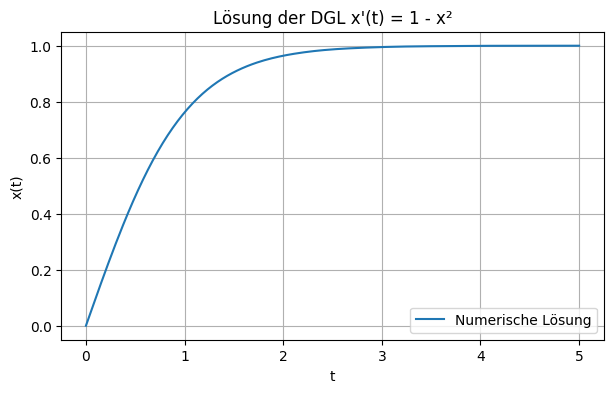

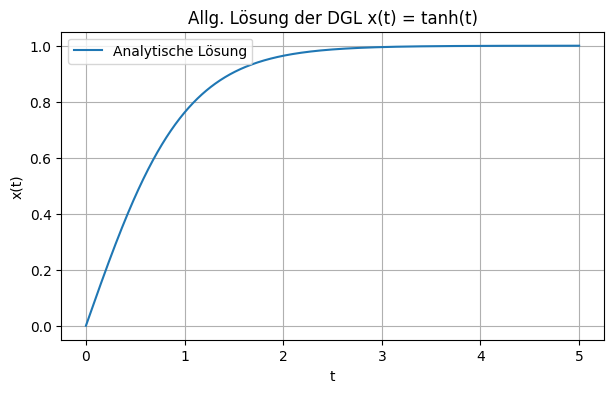

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def dx_dt(t, x):
    return 1 - x**2

# 2) Anfangsbedingung und Integrationsbereich
x0 = [0.0]           # z.B. x(0) = 0
t_span = (0, 5)      # Zeitintervall von 0 bis 5
t_eval = np.linspace(t_span[0], t_span[1], 200)  # Punkte, an denen ausgewertet wird

# 3) Numerische Lösung
solution = solve_ivp(
    dx_dt, 
    t_span, 
    x0,
    t_eval=t_eval, 
    dense_output=True  # Ermöglicht später das "dichtere" Auswerten
)

# 4) Plot der Lösung
plt.figure(figsize=(7,4))
plt.plot(solution.t, solution.y[0], label='Numerische Lösung')
plt.title("Lösung der DGL x'(t) = 1 - x²")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend()
plt.grid(True)
plt.show()


def analytische_loesung(t, C: int = 0): 
    return np.tanh(t + C)

T = np.linspace(0, 5, 1000)
XT = [analytische_loesung(t) for t in T]

plt.figure(figsize=(7,4))
plt.plot(T, XT, label='Analytische Lösung')
plt.title("Allg. Lösung der DGL x(t) = tanh(t)")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend()
plt.grid(True)
plt.show()

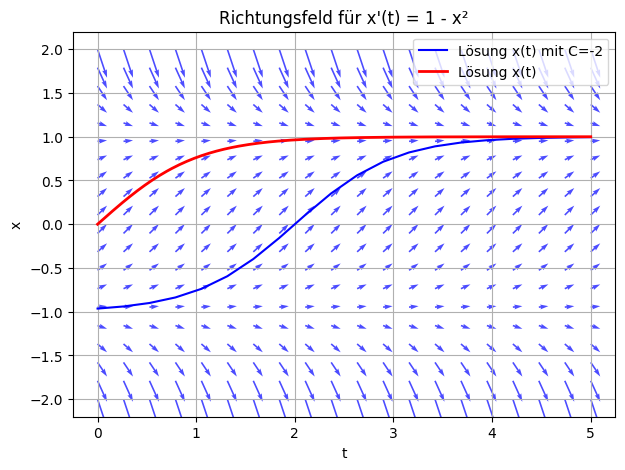

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Erzeuge ein Gitter in der (t, x)-Ebene
t_min, t_max = 0, 5
x_min, x_max = -2, 2

n_t = 20   # Anzahl Gitterpunkte in t-Richtung
n_x = 20   # Anzahl Gitterpunkte in x-Richtung

t_vals = np.linspace(t_min, t_max, n_t)
x_vals = np.linspace(x_min, x_max, n_x)

T, X = np.meshgrid(t_vals, x_vals)  # T und X sind 2D-Arrays
XT = [analytische_loesung(t, -2) for t in t_vals]
# Für x'(t) = 1 - x^2 ist dx/dt nur von x abhängig (nicht von t),
# also f(x) = 1 - X^2 (an den Gitterpunkten)
dXdt = 1 - X**2

# Damit das Feld gut aussieht, definieren wir:
# dt = 1 (willkürlich) und dx = dXdt
# => Pfeile haben Richtung (1, dXdt)
dt = np.ones_like(T)

# Plot des Richtungsfelds mit quiver
plt.figure(figsize=(7,5))
plt.quiver(T, X, dt, dXdt, color="blue", alpha=0.7)
plt.title("Richtungsfeld für x'(t) = 1 - x²")
plt.xlabel("t")
plt.ylabel("x")
plt.grid(True)
plt.plot(t_vals, XT, "b-", label="Lösung x(t) mit C=-2")
plt.plot(solution.t, solution.y[0], "r-", linewidth=2, label="Lösung x(t)")
plt.legend()
plt.show()


## Stabilitätsanalyse

In [19]:
y, t, r, K = sp.symbols('y t r K')

f_y = r * y * (1 - y / K)

f_y

r*y*(1 - y/K)

In [20]:
### Nullstellen bestimmen:

nullstellen = solve(f_y, y)
nullstellen

[0, K]

In [21]:
### Berechne die Ableitung von f(y) nach y:
f_y_prime = sp.diff(f_y, y)
f_y_prime.simplify()

r*(K - 2*y)/K

In [22]:
### Gleichgewichtspunkte y = und y = K einsetzten

stability_at_y0 = f_y_prime.subs(y, 0)
stability_at_yK = f_y_prime.subs(y, K)

stability_at_y0, stability_at_yK
    


(r, -r)

In [23]:

y, t, r, K = sp.symbols('y t r K')

# Definiere die logistische Differentialgleichung
f_y = r * y * (1 - y / K)

# Berechne die Ableitung von f(y) nach y
f_y_prime = sp.diff(f_y, y)

# Setze die Gleichgewichtspunkte y = 0 und y = K ein
stability_at_y0 = f_y_prime.subs(y, 0)
stability_at_yK = f_y_prime.subs(y, K)

stability_at_y0, stability_at_yK


(r, -r)

## DGL 2. Ordnung

### (a)

In [24]:
x = sp.symbols('x')
y = sp.Function('y')

dgl = sp.Eq(y(x).diff(x, 2) - 3*y(x).diff(x) + 2*y(x), 0)
dgl

Eq(2*y(x) - 3*Derivative(y(x), x) + Derivative(y(x), (x, 2)), 0)

In [25]:
loesung = sp.dsolve(dgl, y(x))
loesung.simplify()

Eq(y(x), (C1 + C2*exp(x))*exp(x))

### (b)

In [26]:
eq = x**2 + x

solve(eq, x)

[-1, 0]

In [27]:
x = sp.symbols('x')
y = sp.Function('y')

dgl = sp.Eq(y(x).diff(x, 2) + y(x).diff(x), 0)
dgl



Eq(Derivative(y(x), x) + Derivative(y(x), (x, 2)), 0)

In [28]:
loesung = sp.dsolve(dgl, y(x))
loesung

Eq(y(x), C1 + C2*exp(-x))

### (c)

In [29]:
x = sp.symbols('x')
y = sp.Function('y')

dgl = sp.Eq(y(x).diff(x, 2) - 2*y(x).diff(x) + y(x), sp.exp(x))

dgl


Eq(y(x) - 2*Derivative(y(x), x) + Derivative(y(x), (x, 2)), exp(x))

In [30]:
loesung = sp.dsolve(dgl, y(x))
loesung

Eq(y(x), (C1 + x*(C2 + x/2))*exp(x))

## Optimierungen

In [6]:
from scipy.optimize import minimize

### 1. Optimierung einer einfachen quadratischen Funktion

In [10]:
def obj(x):
    return (x - 3)**2

x0 = 0
result = minimize(obj, x0)
print("Optimales x:", round(result.x[0]))

Optimales x: 3


### 2. Mehrdimensionale Optimierung

In [33]:
def objective(x):
    return (x[0] - 1) ** 2 + (x[1] - 2) ** 2

x0 = [0, 0]

result = minimize(objective, x0)
print("Optimales x und y:", result.x)


Optimales x und y: [0.99999999 1.99999999]


### 3. Messwerte Modell

In [9]:
V = np.array([10, 20, 25, 30, 40, 50]) # Geschwindigkeiten in km/h
S = np.array([4, 10, 14, 20, 30, 42]) # Bremsweg in m

def bremsweg(a, b, v):
    return a * v**2 + b * v

### KQ-Methode über Regression
# Designmatrix erstellen
X = np.vstack((V**2, V)).T  # Jede Zeile ist [v^2, v]

# Kleinste-Quadrate-Lösung
beta = np.linalg.inv(X.T @ X) @ X.T @ S

# Parameter a und b extrahieren
a, b = beta
print(f"Über KQ - Regression: a = {a}, b = {b}")


### Numerische Optimierung 

# Zielfunktion für die Optimierung (Summe der quadratischen Abweichungen)
def fehlerfunktion(params):
    a, b = params
    S_pred = bremsweg(a, b, V)  # Modellierte Werte
    return np.sum((S - S_pred)**2)  # Quadratische Abweichungen

# Startwerte für a und b
startwerte = [0.1, 0.1]

# Numerische Optimierung
result = minimize(fehlerfunktion, startwerte)

# Optimierte Parameter
a_opt, b_opt = result.x
print(f"Numerische Optimierung: a = {a_opt}, b = {b_opt}")

Über KQ - Regression: a = 0.010662739322533098, b = 0.3141678939617087
Numerische Optimierung: a = 0.010662639059361958, b = 0.3141719592756655


## Gradient Verfahren

In [34]:
def f(x):
    return (x + 7)**2

def f_prime(x):
    return 2 * (x + 7)

eta = 0.1      # Lernrate
x = 20.0       # Startwert für x
num_iterations = 1000  # Anzahl Iterationen

for i in range(num_iterations):
    grad = f_prime(x)
    x = x - eta * grad

print("\nGeschätztes Minimum bei x =", x.__round__(2))
print("f(x) =", f(x.__round__(2)))


Geschätztes Minimum bei x = -7.0
f(x) = 0.0


## DGL Pendel

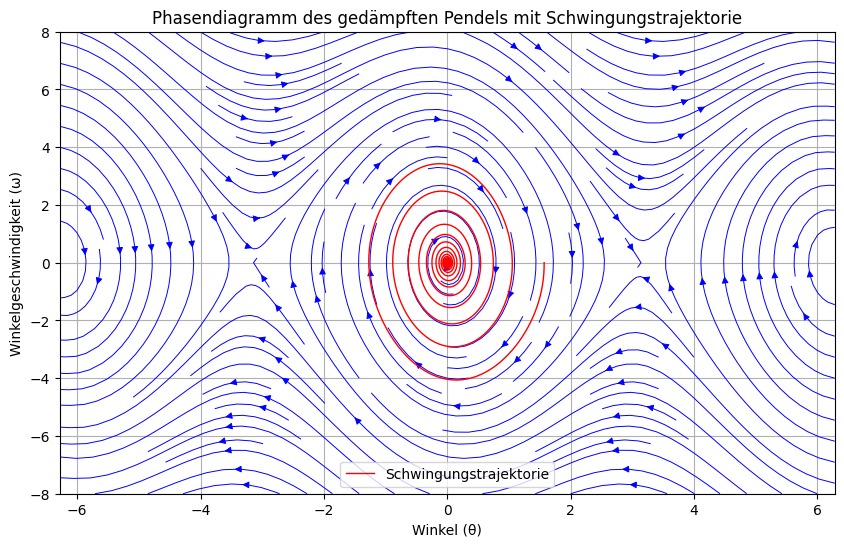

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def pendulum_derivatives(theta, omega, b, g, L):
    """Berechnet die Ableitungen für das Pendel."""
    dtheta = omega
    domega = -b * omega - (g / L) * np.sin(theta)
    return dtheta, domega

# Parameter
g = 9.81  # Erdbeschleunigung (m/s^2)
L = 1.0    # Pendellänge (m)
b = 0.4    # Dämpfungskoeffizient

# Gitter für das Phasendiagramm
theta = np.linspace(-2 * np.pi, 2 * np.pi, 100)
omega = np.linspace(-8, 8, 100)
Theta, Omega = np.meshgrid(theta, omega)

# Berechne Richtungsfeld
DTheta, DOmega = pendulum_derivatives(Theta, Omega, b, g, L)

# Zeichnen des Phasendiagramms
plt.figure(figsize=(10, 6))
plt.streamplot(Theta, Omega, DTheta, DOmega, color="blue", density=1.5, linewidth=0.7)

# Lösung einzeichnen (Schwingungstrajektorie)
def simulate_trajectory(theta0, omega0, b, g, L, dt, steps):
    """Simuliert eine Trajektorie des Pendels."""
    theta, omega = theta0, omega0
    trajectory = [(theta, omega)]
    for _ in range(steps):
        dtheta, domega = pendulum_derivatives(theta, omega, b, g, L)
        theta += dtheta * dt
        omega += domega * dt
        trajectory.append((theta, omega))
    return np.array(trajectory)

# Startwerte für die Trajektorie
theta0, omega0 = np.pi / 2, 0.0
trajectory = simulate_trajectory(theta0, omega0, b, g, L, dt=0.01, steps=5000)

# Trajektorie hinzufügen
plt.plot(trajectory[:, 0], trajectory[:, 1], color="red", linewidth=1, label="Schwingungstrajektorie")
plt.title("Phasendiagramm des gedämpften Pendels mit Schwingungstrajektorie")
plt.xlabel("Winkel (\u03B8)")
plt.ylabel("Winkelgeschwindigkeit (\u03C9)")
plt.xlim(-2 * np.pi, 2 * np.pi)
plt.ylim(-8, 8)
plt.legend()
plt.grid()
plt.show()


## Lineares Messwert Problem

In [100]:
import matplotlib.pyplot as plt
import numpy as np

### Klassisch

In [98]:
A = np.identity(6)

J = np.array(
    [[10**2, 10],
     [20**2, 20],
    [25**2, 25],
    [30**2, 30],
    [40**2, 40],
    [50**2, 50]]
)

b = np.array([[4], [10], [14], [20], [30], [42]])

Jt = J.T

a, b = np.linalg.solve(Jt @ A @J, Jt @ A @ b)

array([0.01066274])

### Normal Verteiltes Setting

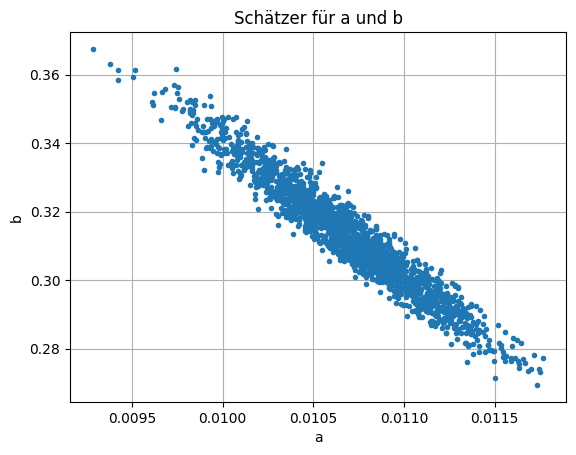

In [137]:
n = 2000
epsilon = np.random.randn(6, 1)
b = np.array([[4], [10], [14], [20], [30], [42]])

p1 = []
p2 = []

for i in range(n):
    J_i = J + np.random.randn(6, 1)
    
    p1_i, p2_i = np.linalg.solve(J_i.T @ A @J_i, J_i.T @ A @ b)
    
    p1.append(p1_i[0])
    p2.append(p2_i[0])
    

plt.plot(p1, p2, 'o', markersize=3)
plt.title("Schätzer für a und b")
plt.xlabel("a")
plt.ylabel("b")
plt.grid(True)
plt.show()